In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
# 导入数据集iris
iris = datasets.load_iris()


In [2]:
# 取样本数据的4列，作为特征属性
X = iris.data
y = iris.target
plt.rc('font', size=14)
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
# 计算K值从1到10对应的平均畸变程度，寻找最佳的K值


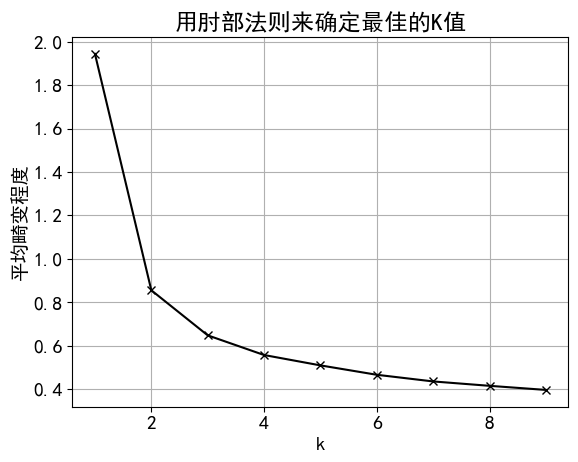

In [3]:
def DrawElbowKMeans(X):
    # 导入KMeans模块
    from sklearn.cluster import KMeans
    # 导入scipy,求解距离
    from scipy.spatial.distance import cdist
    K = range(1, 10)
    meandistortions = []
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        meandistortions.append(
            sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))/X.shape[0])
    import matplotlib.pyplot as plt
    plt.grid(True)
    plt.plot(K, meandistortions, 'kx-')
    plt.xlabel('k')
    plt.ylabel(u'平均畸变程度')
    plt.title(u'用肘部法则来确定最佳的K值')


DrawElbowKMeans(X=X)
plt.show()  # 显示图形

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
data = X
scale = MinMaxScaler().fit(data)
dataScale = scale.transform(data)
kmeans = KMeans(n_clusters=3).fit(dataScale)  # 构建并训练模型


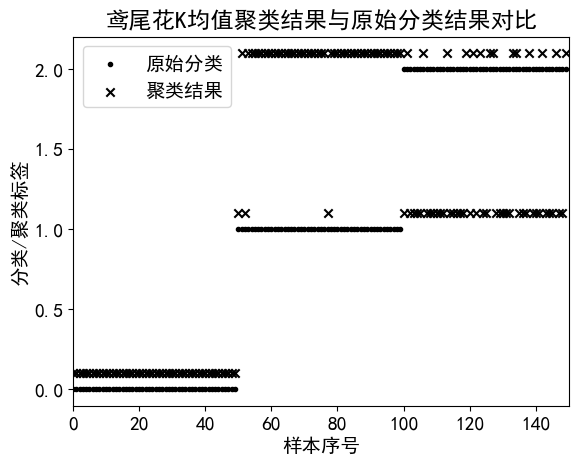

In [5]:
# 可视化，观察聚类结果，与原始类别进行对比
labels=kmeans.labels_   # 提取聚类结果的类标签
plt.scatter(range(y.size),y,c='k',marker='.')
plt.scatter(range(y.size),labels+.1,c='k',marker='x')
plt.xlim((0,y.size))
plt.xlabel('样本序号')
plt.ylabel('分类/聚类标签')
plt.title('鸢尾花K均值聚类结果与原始分类结果对比')
plt.legend(['原始分类','聚类结果'])
